# Package import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import random
import timeit
import sklearn
import sklearn.model_selection
import matplotlib.pyplot as plt
import matplotlib as mpl
import re
import string
import os
from functools import reduce
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import KFold
from sklearn.utils import resample
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout
from keras.wrappers.scikit_learn import KerasClassifier

random.seed(9001) # For Reproducibility of Results
%matplotlib inline

pd.set_option('display.max_rows', 300)

C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Data Load

In [2]:
#NOMIS - CENSUS DATA - DIMENSIONS
population = pd.read_csv('postcodeArea/populationCount.csv', skiprows=8) # 105*8
ageStructure = pd.read_csv('postcodeArea/ageStructure.csv', skiprows=8) #105*20
relationalSituation = pd.read_csv('postcodeArea/relational.csv', skiprows=8) #105*8
livingArrangements = pd.read_csv('postcodeArea/livingArrangements.csv', skiprows=8) #105*9
householdComposition = pd.read_csv('postcodeArea/householdComposition.csv', skiprows=8) #105*23
notInEmploymentDependencies = pd.read_csv('postcodeArea/notInEmploymentDependencies.csv', skiprows=8) #105*10
loneParentDependencies = pd.read_csv('postcodeArea/loneParentDependencies.csv', skiprows=8)#105*13
ethnicGroup = pd.read_csv('postcodeArea/ethnicGroup.csv', skiprows=8) #105*25
industry = pd.read_csv('postcodeArea/industry.csv', skiprows=8)#105*26
tenure = pd.read_csv('postcodeArea/tenure.csv', skiprows=7) #105*8
hoursWorked = pd.read_csv('postcodeArea/hoursWorked.csv', skiprows=8) #105*6
dwelling = pd.read_csv('postcodeArea/dwelling.csv', skiprows=8) #105*5
englishProf = pd.read_csv('postcodeArea/englishProf.csv', skiprows=8) #105*7
centralHeating = pd.read_csv('postcodeArea/centralHeating.csv', skiprows=8) #105*9
passportHeld = pd.read_csv('postcodeArea/passportHeld.csv', skiprows=7) #105*73
birthCountry = pd.read_csv('postcodeArea/birthCountry.csv', skiprows=8) #105*9
religion = pd.read_csv('postcodeArea/religion.csv', skiprows=8) #8063*12
generalHealth = pd.read_csv('postcodeArea/generalHealth.csv', skiprows=8) #105*7
yearLastWorked = pd.read_csv('postcodeArea/yearLastWorked.csv', skiprows=8) #105*13
householdSize = pd.read_csv('postcodeArea/householdSize.csv', skiprows=8) #105*10
carOrVanAvailability = pd.read_csv('postcodeArea/carOrVanAvailability.csv', skiprows=8) #105*7
distanceTravelledtoWork = pd.read_csv('postcodeArea/distanceTravelledtoWork.csv', skiprows=8) #105*14
methodofTraveltoWork = pd.read_csv('postcodeArea/methodofTraveltoWork.csv', skiprows=8) #105*14
ageofArrival = pd.read_csv('postcodeArea/ageofArrival.csv', skiprows=8) #105*19
lengthofResidence = pd.read_csv('postcodeArea/lengthofResidence.csv', skiprows=8) #105*7
occupationType = pd.read_csv('postcodeArea/occupation.csv', skiprows=8) #105*11
mainLanguage = pd.read_csv('postcodeArea/mainLanguage.csv', skiprows=8) #105*105
bedrooms = pd.read_csv('postcodeArea/bedrooms.csv', skiprows=8) #105*8
longTermDisability = pd.read_csv('postcodeArea/longTermDisability.csv', skiprows=8) #105*5
economicActivity = pd.read_csv('postcodeArea/economicActivity.csv', skiprows=8) #105*17
positionInCommunalEstablishment = pd.read_csv('postcodeArea/positionInCommunalEstablishment.csv', skiprows=8) #105*5
accomType = pd.read_csv('postcodeArea/accomType.csv', skiprows=8) #105*13
secondAddress = pd.read_csv('postcodeArea/secondAddress.csv', skiprows=8) #105*6
formerIndustry = pd.read_csv('postcodeArea/formerIndustry.csv', skiprows=8) #105*11
formerOccupation = pd.read_csv('postcodeArea/formerOccupation.csv', skiprows=8) #105*12


religion = religion.drop(religion.index[-24:]) # line added due to notes at bottom of CSV

qualification = pd.read_csv('postcodeArea/qualification.csv', skiprows=8) #105*14   # AS A PROPORTION ONLY 


# Set up classification problem

In [3]:
qualification.drop(qualification.columns[[1,2,3,4,5,7,8,9,10,11,12]], axis=1, inplace=True)
qualification = qualification.rename(index=str, columns={"Highest level of qualification: Level 4 qualifications and above": "target"})

In [4]:
qualification.quantile(0.7) # Check to see where 70 percent quartile is to setup class imbalance

target    29.5
Name: 0.7, dtype: float64

In [5]:
# Assign a 1 or a zero as a output depending on whether proportion of people have, or don't have a higher education degree
qualification['classification'] = np.where(qualification['target']>=29.5, 1, 0) 

#Check
values = qualification.groupby('classification').count()
values['perc']= values['target']/values['target'].sum()
values

,postcode areas,target,perc
classification,,,
0,73,73,0.695238
1,32,32,0.304762


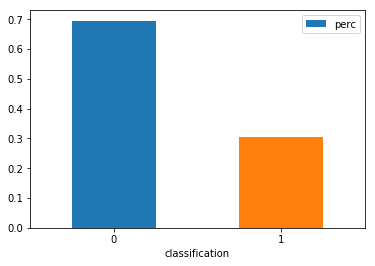

In [6]:
ax = values.plot.bar(y = 'perc',rot=0, )

# Combine datasets

In [7]:
###Merge different datasets
newDF = [population, ageStructure, relationalSituation, livingArrangements, householdComposition,notInEmploymentDependencies,loneParentDependencies,ethnicGroup,industry,tenure, hoursWorked,dwelling,englishProf,centralHeating,passportHeld,birthCountry,religion,generalHealth,yearLastWorked,householdSize,carOrVanAvailability,distanceTravelledtoWork,methodofTraveltoWork,ageofArrival,lengthofResidence,occupationType,mainLanguage,bedrooms,longTermDisability,economicActivity,positionInCommunalEstablishment,accomType,secondAddress,formerIndustry,formerOccupation,qualification]
newDF2 = pd.concat([i.set_index('postcode areas') for i in newDF],axis=1, join='outer')

In [8]:
#Check for dimensions
newDF2.shape

(109, 905)

In [9]:
#drop rows without any information
newDF3 = newDF2.dropna()
newDF3.shape

(105, 905)

In [10]:
#drop duplicate columns arising from merging...
newDF4 = newDF3.T.drop_duplicates().T

In [11]:
#remove spaces from variable names to allow access to columns
newDF4.columns = newDF4.columns.map(lambda x: x.replace(' ', '_'))

# Splitting data into Train, Test and Validation

In [12]:
featuresforTraining = newDF4.drop(['target','classification'], axis=1)

In [13]:
#Define function for splitting data
def validationTrainTestSplit(featuresforTraining, newDF4):#Splits data into 60-20-20 spilt 
    X_train1, X_test, y_train1, y_test = train_test_split(featuresforTraining, newDF4.classification, random_state=0, test_size=.2)
    X_train, X_validation, y_train,y_validation = train_test_split(X_train1, y_train1, random_state=0, test_size=.25)
    
    return X_train, X_test, X_validation, y_train, y_validation,y_test

In [14]:
#Execute function for splitting data
X_train, X_test, X_validation, y_train, y_validation,y_test = validationTrainTestSplit(featuresforTraining,newDF4)

# Scaling

In [15]:
#Scale the Data
scaler = StandardScaler()

In [16]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [17]:
X_train = scaler.transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

In [18]:
X_validation.shape


(21, 852)

# Model

In [78]:
def hyperParameterTuneDeepnet(i,j,k,X_train,y_train,X_test,y_test):
    deepLearn = Sequential()
    deepLearn.add(Dense(i, input_dim=852, activation='relu'))
    deepLearn.add(Dense(j, activation='relu'))
    deepLearn.add(Dense(1, activation='sigmoid'))
    deepLearn.compile(loss='binary_crossentropy', optimizer='adam')
    deepLearn.fit(X_train, y_train, epochs=k, verbose=0)

    y_pred = deepLearn.predict_classes(X_test)
    y_pred = pd.DataFrame(y_pred, dtype='int')
    y_pred = y_pred[0]
    y_pred=y_pred.astype('int')
    y_test=y_test.astype('int')
    print("  Hiddenlayer1 =" + str(i) + "          Hiddenlayer2 =" + str(j) + "         epochs =" + str(k) )
    #print metrics
    print('CONFUSION MATRIX:   ')
    confusion_matrix2 = confusion_matrix(y_test, y_pred)
    print(confusion_matrix2)

    print('CLASSIFICATION REPORT:    ')
    print(classification_report(y_test, y_pred))

    print('ROC CURVE')
    logit_roc_auc = roc_auc_score(y_test, deepLearn.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, deepLearn.predict_proba(X_test))
    plt.figure()
    plt.plot(fpr, tpr, label='Deep Learning (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    return

In [79]:
#HYPER PARAMETER TUNE
hiddenlayer1 = [70,300,500] 
hiddenlayer2 = [70,300,500]
epochs = [1,10,25,50]

  Hiddenlayer1 =70          Hiddenlayer2 =70         epochs =1
CONFUSION MATRIX:   
[[11  2]
 [ 4  4]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.73      0.85      0.79        13
          1       0.67      0.50      0.57         8

avg / total       0.71      0.71      0.70        21

ROC CURVE


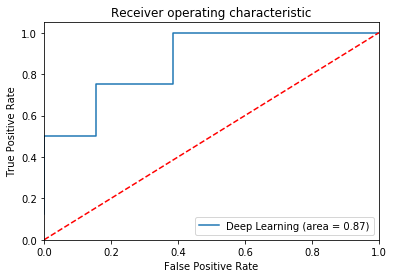

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Hiddenlayer1 =70          Hiddenlayer2 =70         epochs =10
CONFUSION MATRIX:   
[[12  1]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.86      0.92      0.89        13
          1       0.86      0.75      0.80         8

avg / total       0.86      0.86      0.86        21

ROC CURVE


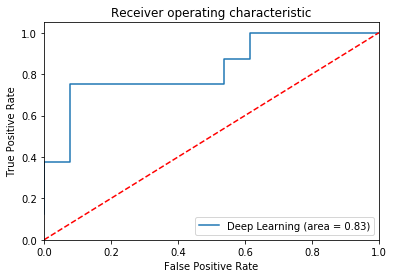

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Hiddenlayer1 =70          Hiddenlayer2 =70         epochs =25
CONFUSION MATRIX:   
[[11  2]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.85      0.85      0.85        13
          1       0.75      0.75      0.75         8

avg / total       0.81      0.81      0.81        21

ROC CURVE


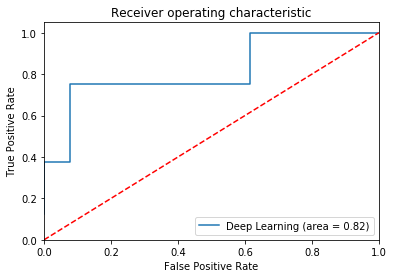

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Hiddenlayer1 =70          Hiddenlayer2 =70         epochs =50
CONFUSION MATRIX:   
[[12  1]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.80      0.92      0.86        13
          1       0.83      0.62      0.71         8

avg / total       0.81      0.81      0.80        21

ROC CURVE


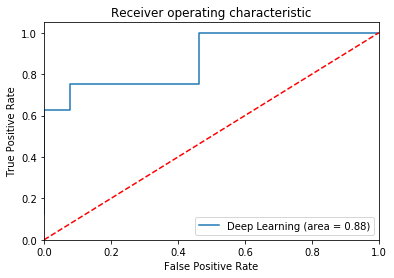

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Hiddenlayer1 =70          Hiddenlayer2 =300         epochs =1
CONFUSION MATRIX:   
[[11  2]
 [ 6  2]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.65      0.85      0.73        13
          1       0.50      0.25      0.33         8

avg / total       0.59      0.62      0.58        21

ROC CURVE


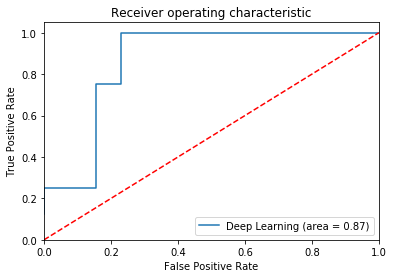

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Hiddenlayer1 =70          Hiddenlayer2 =300         epochs =10
CONFUSION MATRIX:   
[[13  0]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.81      1.00      0.90        13
          1       1.00      0.62      0.77         8

avg / total       0.88      0.86      0.85        21

ROC CURVE


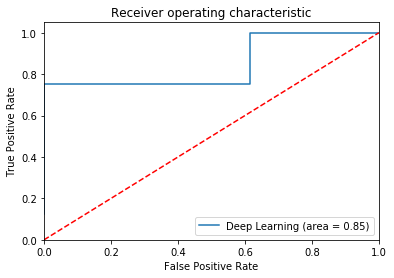

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Hiddenlayer1 =70          Hiddenlayer2 =300         epochs =25
CONFUSION MATRIX:   
[[12  1]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.86      0.92      0.89        13
          1       0.86      0.75      0.80         8

avg / total       0.86      0.86      0.86        21

ROC CURVE


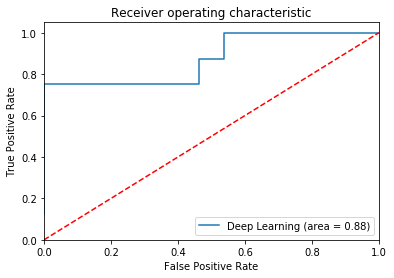

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Hiddenlayer1 =70          Hiddenlayer2 =300         epochs =50
CONFUSION MATRIX:   
[[12  1]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.80      0.92      0.86        13
          1       0.83      0.62      0.71         8

avg / total       0.81      0.81      0.80        21

ROC CURVE


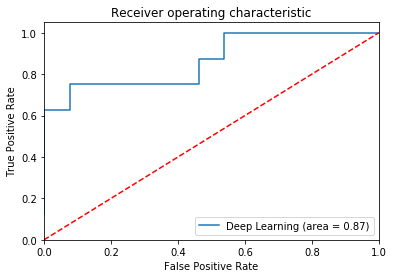

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Hiddenlayer1 =70          Hiddenlayer2 =500         epochs =1
CONFUSION MATRIX:   
[[13  0]
 [ 5  3]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.72      1.00      0.84        13
          1       1.00      0.38      0.55         8

avg / total       0.83      0.76      0.73        21

ROC CURVE


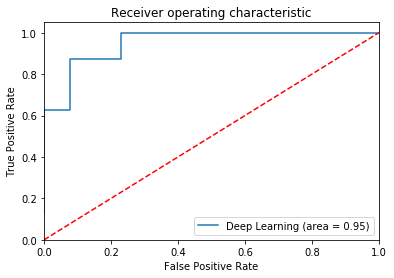

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Hiddenlayer1 =70          Hiddenlayer2 =500         epochs =10
CONFUSION MATRIX:   
[[11  2]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.85      0.85      0.85        13
          1       0.75      0.75      0.75         8

avg / total       0.81      0.81      0.81        21

ROC CURVE


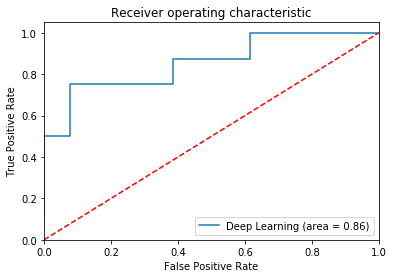

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Hiddenlayer1 =70          Hiddenlayer2 =500         epochs =25
CONFUSION MATRIX:   
[[12  1]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.86      0.92      0.89        13
          1       0.86      0.75      0.80         8

avg / total       0.86      0.86      0.86        21

ROC CURVE


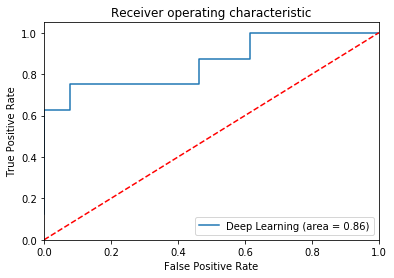

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Hiddenlayer1 =70          Hiddenlayer2 =500         epochs =50
CONFUSION MATRIX:   
[[12  1]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.80      0.92      0.86        13
          1       0.83      0.62      0.71         8

avg / total       0.81      0.81      0.80        21

ROC CURVE


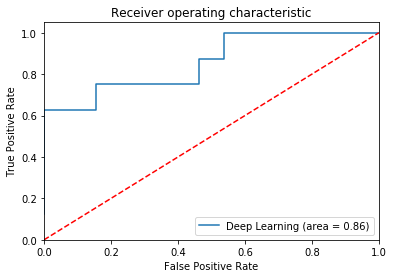

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Hiddenlayer1 =300          Hiddenlayer2 =70         epochs =1
CONFUSION MATRIX:   
[[13  0]
 [ 5  3]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.72      1.00      0.84        13
          1       1.00      0.38      0.55         8

avg / total       0.83      0.76      0.73        21

ROC CURVE


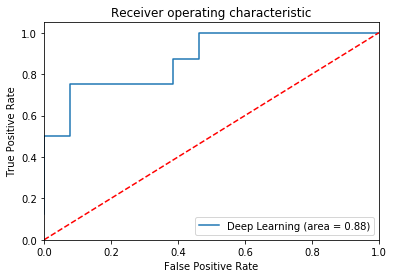

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Hiddenlayer1 =300          Hiddenlayer2 =70         epochs =10
CONFUSION MATRIX:   
[[12  1]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.86      0.92      0.89        13
          1       0.86      0.75      0.80         8

avg / total       0.86      0.86      0.86        21

ROC CURVE


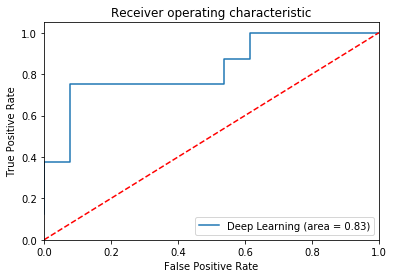

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Hiddenlayer1 =300          Hiddenlayer2 =70         epochs =25
CONFUSION MATRIX:   
[[12  1]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.86      0.92      0.89        13
          1       0.86      0.75      0.80         8

avg / total       0.86      0.86      0.86        21

ROC CURVE


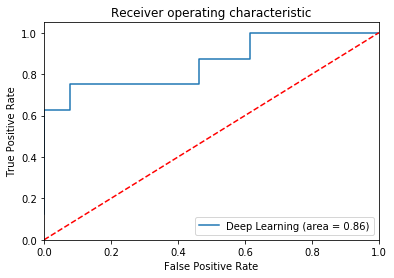

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Hiddenlayer1 =300          Hiddenlayer2 =70         epochs =50
CONFUSION MATRIX:   
[[12  1]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.80      0.92      0.86        13
          1       0.83      0.62      0.71         8

avg / total       0.81      0.81      0.80        21

ROC CURVE


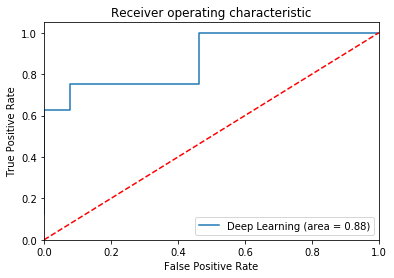

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Hiddenlayer1 =300          Hiddenlayer2 =300         epochs =1
CONFUSION MATRIX:   
[[12  1]
 [ 4  4]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.75      0.92      0.83        13
          1       0.80      0.50      0.62         8

avg / total       0.77      0.76      0.75        21

ROC CURVE


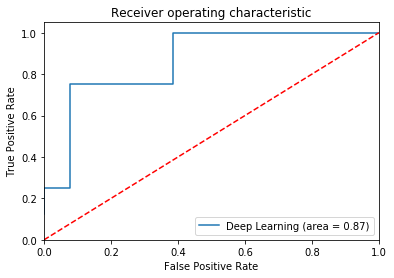

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Hiddenlayer1 =300          Hiddenlayer2 =300         epochs =10
CONFUSION MATRIX:   
[[13  0]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.81      1.00      0.90        13
          1       1.00      0.62      0.77         8

avg / total       0.88      0.86      0.85        21

ROC CURVE


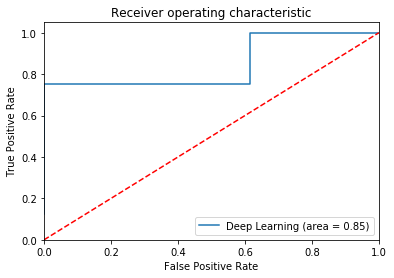

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Hiddenlayer1 =300          Hiddenlayer2 =300         epochs =25
CONFUSION MATRIX:   
[[12  1]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.86      0.92      0.89        13
          1       0.86      0.75      0.80         8

avg / total       0.86      0.86      0.86        21

ROC CURVE


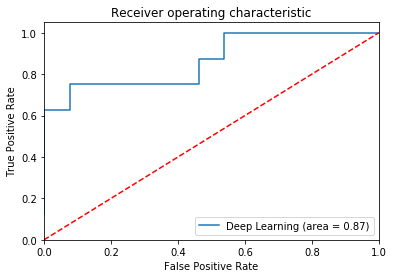

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Hiddenlayer1 =300          Hiddenlayer2 =300         epochs =50
CONFUSION MATRIX:   
[[12  1]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.80      0.92      0.86        13
          1       0.83      0.62      0.71         8

avg / total       0.81      0.81      0.80        21

ROC CURVE


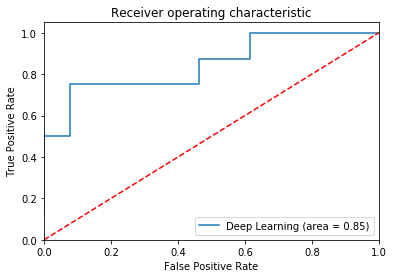

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Hiddenlayer1 =300          Hiddenlayer2 =500         epochs =1
CONFUSION MATRIX:   
[[13  0]
 [ 6  2]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.68      1.00      0.81        13
          1       1.00      0.25      0.40         8

avg / total       0.80      0.71      0.66        21

ROC CURVE


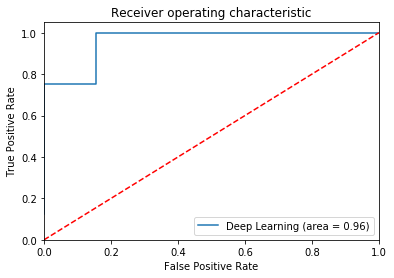

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Hiddenlayer1 =300          Hiddenlayer2 =500         epochs =10
CONFUSION MATRIX:   
[[12  1]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.86      0.92      0.89        13
          1       0.86      0.75      0.80         8

avg / total       0.86      0.86      0.86        21

ROC CURVE


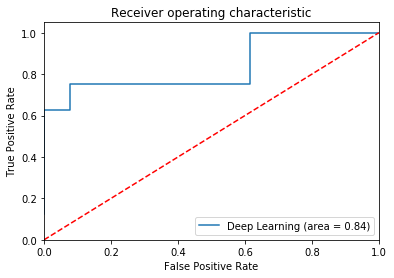

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Hiddenlayer1 =300          Hiddenlayer2 =500         epochs =25
CONFUSION MATRIX:   
[[12  1]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.80      0.92      0.86        13
          1       0.83      0.62      0.71         8

avg / total       0.81      0.81      0.80        21

ROC CURVE


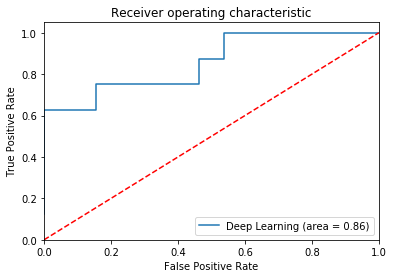

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Hiddenlayer1 =300          Hiddenlayer2 =500         epochs =50
CONFUSION MATRIX:   
[[12  1]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.86      0.92      0.89        13
          1       0.86      0.75      0.80         8

avg / total       0.86      0.86      0.86        21

ROC CURVE


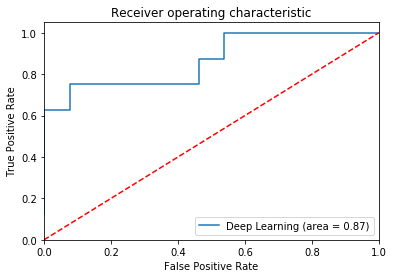

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Hiddenlayer1 =500          Hiddenlayer2 =70         epochs =1
CONFUSION MATRIX:   
[[12  1]
 [ 4  4]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.75      0.92      0.83        13
          1       0.80      0.50      0.62         8

avg / total       0.77      0.76      0.75        21

ROC CURVE


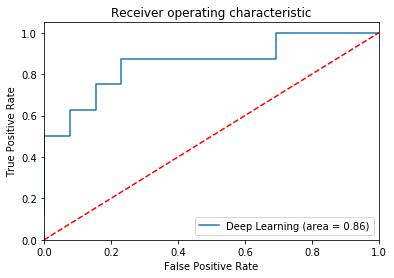

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Hiddenlayer1 =500          Hiddenlayer2 =70         epochs =10
CONFUSION MATRIX:   
[[13  0]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.87      1.00      0.93        13
          1       1.00      0.75      0.86         8

avg / total       0.92      0.90      0.90        21

ROC CURVE


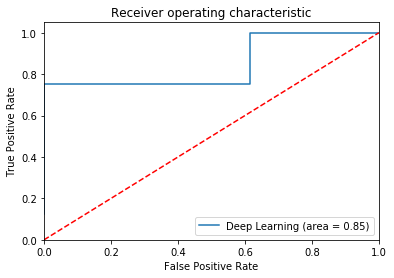

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Hiddenlayer1 =500          Hiddenlayer2 =70         epochs =25
CONFUSION MATRIX:   
[[12  1]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.80      0.92      0.86        13
          1       0.83      0.62      0.71         8

avg / total       0.81      0.81      0.80        21

ROC CURVE


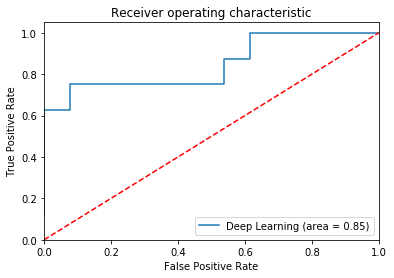

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Hiddenlayer1 =500          Hiddenlayer2 =70         epochs =50
CONFUSION MATRIX:   
[[12  1]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.86      0.92      0.89        13
          1       0.86      0.75      0.80         8

avg / total       0.86      0.86      0.86        21

ROC CURVE


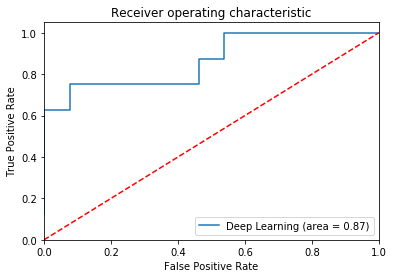

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Hiddenlayer1 =500          Hiddenlayer2 =300         epochs =1
CONFUSION MATRIX:   
[[13  0]
 [ 5  3]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.72      1.00      0.84        13
          1       1.00      0.38      0.55         8

avg / total       0.83      0.76      0.73        21

ROC CURVE


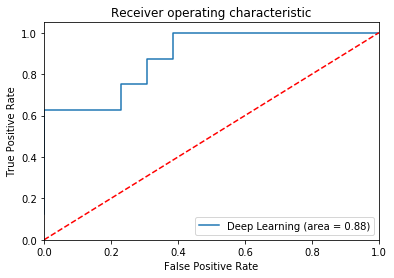

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Hiddenlayer1 =500          Hiddenlayer2 =300         epochs =10
CONFUSION MATRIX:   
[[11  2]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.85      0.85      0.85        13
          1       0.75      0.75      0.75         8

avg / total       0.81      0.81      0.81        21

ROC CURVE


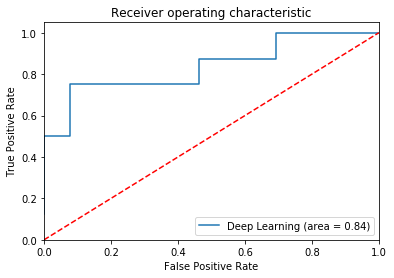

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Hiddenlayer1 =500          Hiddenlayer2 =300         epochs =25
CONFUSION MATRIX:   
[[12  1]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.80      0.92      0.86        13
          1       0.83      0.62      0.71         8

avg / total       0.81      0.81      0.80        21

ROC CURVE


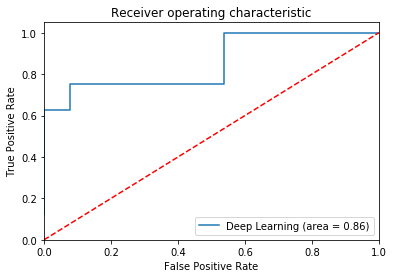

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Hiddenlayer1 =500          Hiddenlayer2 =300         epochs =50
CONFUSION MATRIX:   
[[13  0]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.81      1.00      0.90        13
          1       1.00      0.62      0.77         8

avg / total       0.88      0.86      0.85        21

ROC CURVE


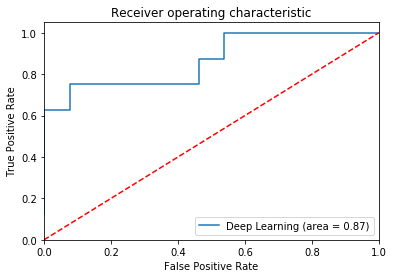

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Hiddenlayer1 =500          Hiddenlayer2 =500         epochs =1
CONFUSION MATRIX:   
[[13  0]
 [ 6  2]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.68      1.00      0.81        13
          1       1.00      0.25      0.40         8

avg / total       0.80      0.71      0.66        21

ROC CURVE


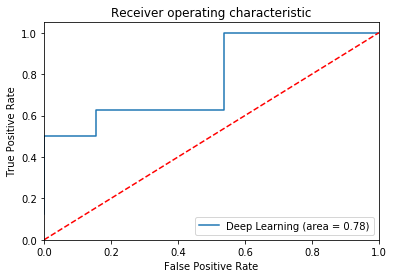

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Hiddenlayer1 =500          Hiddenlayer2 =500         epochs =10
CONFUSION MATRIX:   
[[13  0]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.87      1.00      0.93        13
          1       1.00      0.75      0.86         8

avg / total       0.92      0.90      0.90        21

ROC CURVE


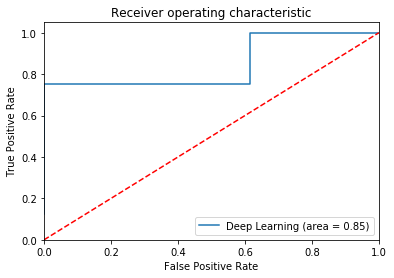

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Hiddenlayer1 =500          Hiddenlayer2 =500         epochs =25
CONFUSION MATRIX:   
[[13  0]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.87      1.00      0.93        13
          1       1.00      0.75      0.86         8

avg / total       0.92      0.90      0.90        21

ROC CURVE


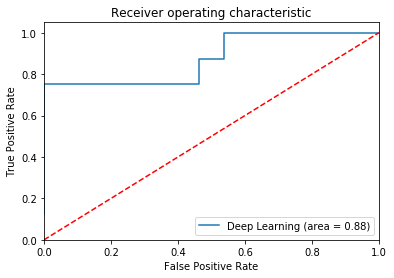

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Hiddenlayer1 =500          Hiddenlayer2 =500         epochs =50
CONFUSION MATRIX:   
[[12  1]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.80      0.92      0.86        13
          1       0.83      0.62      0.71         8

avg / total       0.81      0.81      0.80        21

ROC CURVE


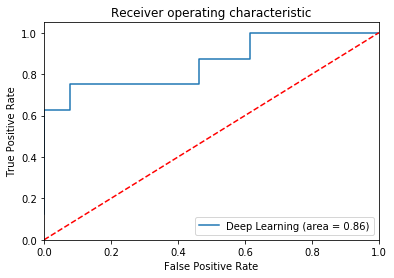

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
Time Elapsed:
80.59867321917818


In [80]:
#Find optimal parameters
start_time = timeit.default_timer()
for i in hiddenlayer1:
    for j in hiddenlayer2:
        for k in epochs:
            hyperParameterTuneDeepnet(i,j,k,X_train,y_train,X_validation,y_validation)
elapsed = timeit.default_timer() - start_time
print("Time Elapsed:")
print(elapsed)            

# OPTIMAL PARAMETERS:

### hiddenlayer1: 500---------hiddenlayer2: 70---------epochs: 10

### COMPUTE TIME: 80.599s

# Test on Unseen Data with optimal hyperparameters

  Hiddenlayer1 =500          Hiddenlayer2 =70         epochs =10
CONFUSION MATRIX:   
[[15  2]
 [ 0  4]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       1.00      0.88      0.94        17
          1       0.67      1.00      0.80         4

avg / total       0.94      0.90      0.91        21

ROC CURVE


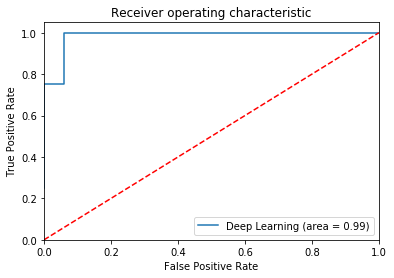

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------


In [81]:
hyperParameterTuneDeepnet(500,70,10,X_train,y_train,X_test,y_test)